In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

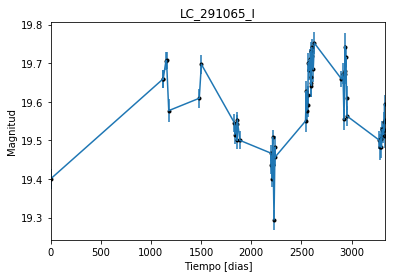

In [2]:
data = np.genfromtxt('LC_291065_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_291065_I')
plt.savefig("LC_291065_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

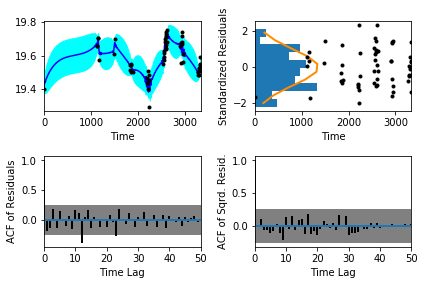

In [5]:
sample.assess_fit()

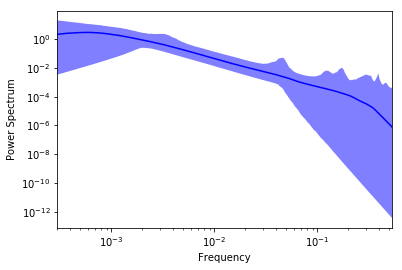

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

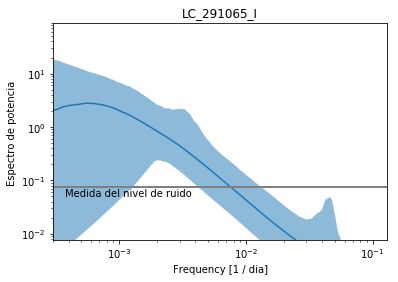

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_291065_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_291065_I')

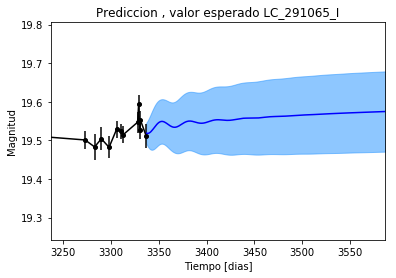

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_291065_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_291065_I')

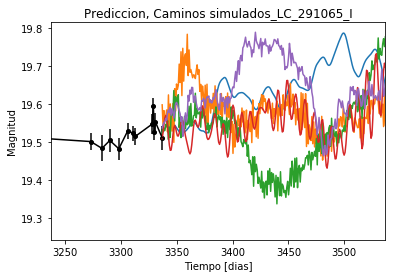

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_291065_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


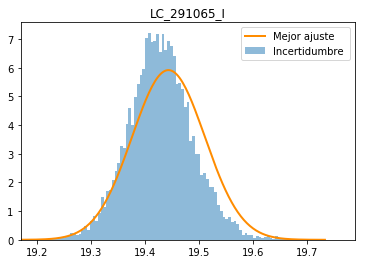

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_291065_I')
plt.savefig("Mejor_ajuste_LC_285764_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_291065_I')

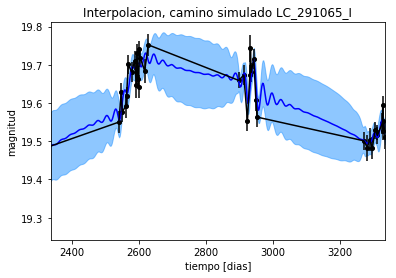

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_I')

Text(0.5,1,'Interpolacion, camino simulado LC_291065_I')

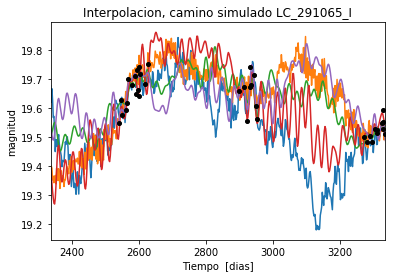

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_291065_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1334.23492488
Median: 0.0105342404242
Standard deviation: 0.10610425148
68% credibility interval: [ 0.0030129   0.04439267]
95% credibility interval: [ 0.00061287  0.34489674]
99% credibility interval: [  3.44595422e-04   7.85775118e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 630.550192555
Median: 0.00950427112799
Standard deviation: 0.0652709002381
68% credibility interval: [ 0.00240419  0.03684813]
95% credibility interval: [ 0.00045877  0.1964901 ]
99% credibility interval: [  3.23739832e-04   4.60680198e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 308.76611949
Median: 0.00277526953098
Standard deviation: 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 565.21783101
Median: 106.595740807
Standard deviation: 2.16887895568
68% credibility interval: [ 104.29120777  108.39302542]
95% credibility interval: [ 101.25238046  110.00312431]
99% credibility interval: [  99.1258776   110.29139178]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 401.213729932
Median: 0.542157811172
Standard deviation: 2.06932390781
68% credibility interval: [ 0.09634148  3.72302547]
95% credibility interval: [ 0.03684112  6.79592689]
99% credibility interval: [ 0.02155789  9.07018998]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 272.235875215
Median: 3.3798447496
Standard deviation: 11.2204747554
68% credibility interval: [  0.2390373   19.58954388]
95% credibility interval: [  0.05912606  3

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3180.43788182
Median: 3.7054284578e+25
Standard deviation: 1.49306357699e+125
68% credibility interval: [  3.47834931e-52   1.09719813e+64]
95% credibility interval: [  2.12670752e-92   1.77847987e+83]
99% credibility interval: [  2.41388197e-135   2.27170198e+111]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1140.90062646
Median: 19.5672396303
Standard deviation: 0.0432540381031
68% credibility interval: [ 19.53079328  19.60032672]
95% credibility interval: [ 19.47189372  19.64883294]
99% credibility interval: [ 19.40313111  19.69240079]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 366.91765707
Median: 0.244651859347
Standard deviation: 0.286243215428
68% credibility interval: [ 0.04713115  0.68458451]
95% credibility interval: [ 0.          0.96720315]
99% credibility interval: [ 0.          1.04564619]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 366.91765707
Median: 0.244651859347
Standard deviation: 0.286243215428
68% credibility interval: [ 0.04713115  0.68458451]
95% credibility interval: [ 0.          0.96720315]
99% credibility interval: [ 0.          1.04564619]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 287.296919632
Median: 0.0
Standard deviation: 0.000869030939485
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 565.21783101
Median: 106.595740807
Standard deviation: 2.16887895568
68% credibility interval: [ 104.29120777  108.39302542]
95% credibility interval: [ 101.25238046  110.00312431]
99% credibility interval: [  99.1258776   110.29139178]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1469.18604365
Median: 0.0131161105929
Standard deviation: 0.00897223400291
68% credibility interval: [ 0.00862195  0.02181374]
95% credibility interval: [ 0.0062107   0.03849352]
99% credibility interval: [ 0.00488029  0.05731254]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1272.52800907
Median: 1.22875135867
Standard deviation: 0.273632981134
68% credibility interval: [ 0.98594887  1.53913088]
95% credibility interval: [ 0.78938963  1.85962797]
99% credibility interval: [ 0.70105895  1.96494521]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 390.282512389
Median: 2.19349780683e-28
Standard deviation: 0.319889046258
68% credibility interval: [  1.07959845e-65   8.45435343e-02]
95% credibility interval: [  3.51441459e-86   9.53123832e-01]
99% credibility interval: [  2.34912478e-112   2.38311196e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1334.23492488
Median: (-0.0661885846559-1.34669503049j)
Standard deviation: 1.9181041793
68% credibility interval: [-0.27892737-1.17986917j -0.01893059-0.29790477j]
95% credibility interval: [-2.16705013-0.13409015j -0.00385077-0.23657984j]
99% credibility interval: [ -4.93717068e+00-4.90404166j  -2.16515689e-03-5.55751508j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 630.550192555
Median: (-0.0597170967069+4.67698730346j)
Standard deviation: 1.84468444801
68% credibility interval: [-0.23152362+1.55689996j -0.01510600+0.29152154j]
95% credibility interval: [-1.23458370+1.69633643j -0.00288251+5.65007262j]
99% credibility interval: [ -2.89453905e+00+1.94504858j  -2.03411736e-03+0.j        ]
Posterior summary for par